##### Illustration showing how to use process.py

In [1]:
from process import *
from IPython.display import display
# Image reader
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.morphology import label
from skimage.transform import resize
from skimage import morphology

In [2]:
# visualization
%matplotlib inline
import matplotlib.pyplot as plt

#### `ImagePrec` Object:

Taking arguments:

    - path: training set path
    - size: cropped image size
    - channel: should always be 3
    - normalize: Current normalization way is img = (img - img.mean())/img.std()

In [3]:
## Creating an object
ip = ImagePrec(path = '../data/train',size=200, channel=3, normalize=True)

Extracting training image info ...
Time Usage: 75.025482893 sec
670 670 670


In [4]:
n = ip.get_num()
ids = ip.get_ids()
print n

670


##### Random showing images and masks to see whether they match each other or not

In [5]:
idx = np.array([np.random.randint(n) for i in range(6)])

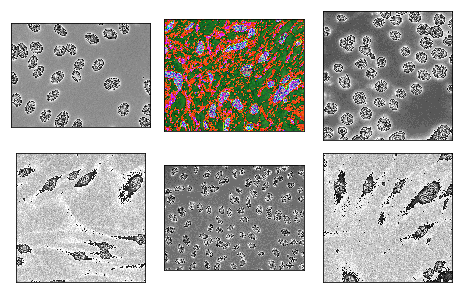

In [6]:
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
for i, ax in enumerate(axes.flat):
    ax.imshow(ip._imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

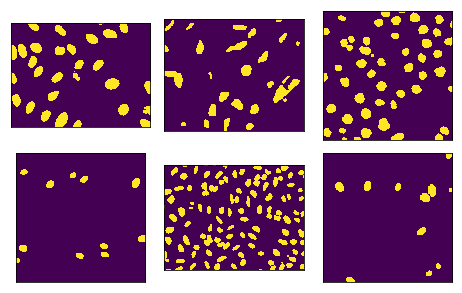

In [7]:
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
for i, ax in enumerate(axes.flat):
    ax.imshow(ip._masks[i])
    ax.set_xticks([])
    ax.set_yticks([])

##### Getting training batch for each epoch via random crops

#### `ip.get_batch_cropped`: taking arguments:

    - train_idx: training set idx
    - expand: how many cropped images for each original image
    - return: dict containing train_x and train_y for tensorflow/keras input/output

In [8]:
crop_x, crop_y = ip.get_batch_cropped(train_idx=idx, expand=1)

Getting cropped images ...


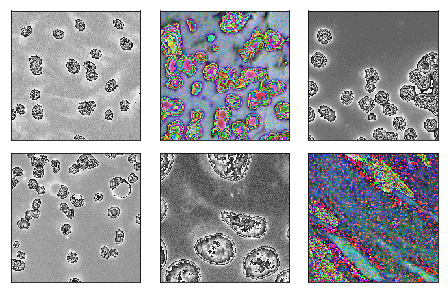

In [9]:
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.0)
for img, ax in zip(crop_x, axes.flat):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

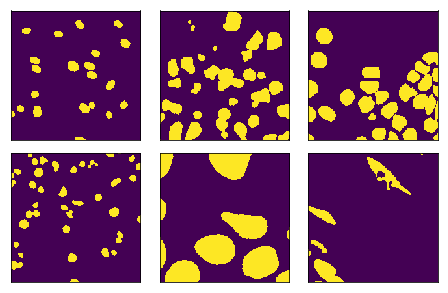

In [10]:
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.0)
for img, ax in zip(crop_y, axes.flat):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

#### `ip.augment(self, x, y)`
    
    - return augmented data set

In [11]:
crop_x_aug, crop_y_aug = ip.augment(crop_x, crop_y)
print crop_x_aug.shape, crop_y_aug.shape

(48, 200, 200, 3) (48, 200, 200)


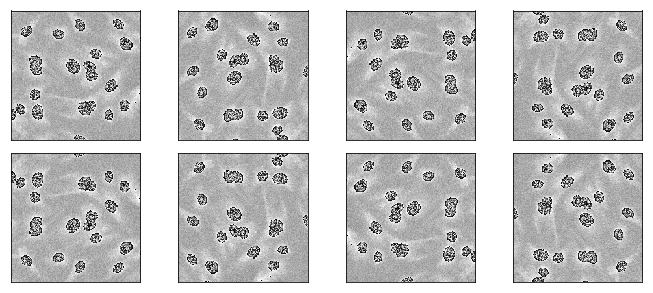

In [12]:
fig, axes = plt.subplots(2, 4, figsize = (12, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.0)
for i, ax in enumerate(axes.flat):
    ax.imshow(crop_x_aug[i*6])
    ax.set_xticks([])
    ax.set_yticks([])

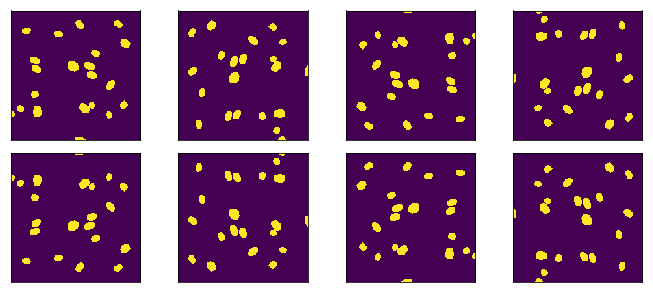

In [13]:
fig, axes = plt.subplots(2, 4, figsize = (12, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.0)
for i, ax in enumerate(axes.flat):
    ax.imshow(crop_y_aug[i*6])
    ax.set_xticks([])
    ax.set_yticks([])

##### `ip.get_batch_resized(self, train_idx):`

    - Get training batch that is generated using resize

In [14]:
resize_x, resize_y = ip.get_batch_resized(idx)

Getting resized images ...


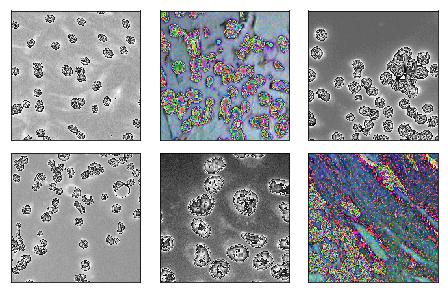

In [15]:
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.0)
for img, ax in zip(resize_x, axes.flat):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

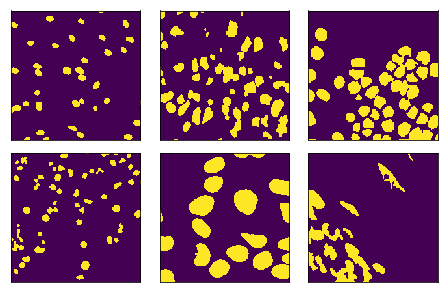

In [16]:
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.0)
for img, ax in zip(resize_y, axes.flat):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

In [17]:
resize_x_aug, resize_y_aug = ip.augment(resize_x, resize_y)
print resize_x_aug.shape, resize_y_aug.shape

(48, 200, 200, 3) (48, 200, 200)


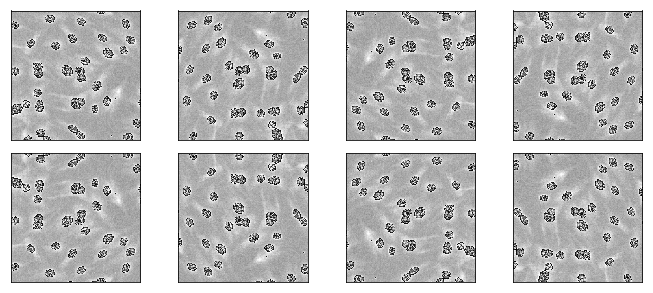

In [18]:
fig, axes = plt.subplots(2, 4, figsize = (12, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.0)
for i, ax in enumerate(axes.flat):
    ax.imshow(resize_x_aug[i*6])
    ax.set_xticks([])
    ax.set_yticks([])

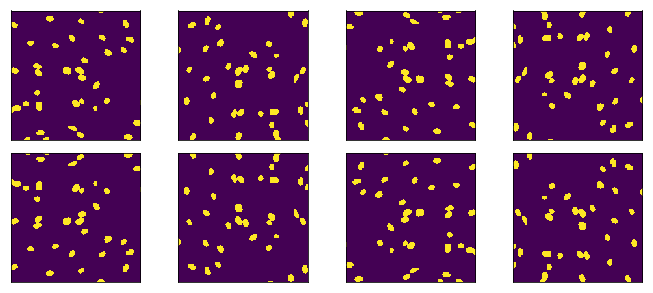

In [19]:
fig, axes = plt.subplots(2, 4, figsize = (12, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.0)
for i, ax in enumerate(axes.flat):
    ax.imshow(resize_y_aug[i*6])
    ax.set_xticks([])
    ax.set_yticks([])

##### `ip.get_valid_set(self, valid_idx)`
    - return valid set for K fold

In [20]:
ip.get_valid_set(idx)
print ip._test_ids[:3]
print np.array(ip._test_imgs).shape

Extracting validation image info ...
Time Usage: 4.6968460083e-05 sec
6 6
['b82548ab19466b461614e6055aaf49fbc24c03a2d20e65575b680c7c28268807', '718751b439c05bdd589f04fcef321a86be3ecb35292a435138e295e05eb2e771', 'edd36ed822e7ed760ff73e0524df22aa5bf5c565efcdc6c39603239c0896e7a8']
(6,)


#### `ip.get_test_set`: loading testing images
Taking arguments:

    - path: testing image path
    - normalize: the same as __init__

In [21]:
ip.get_test_set(path='../data/test', normalize=True)
print ip._test_ids[:3]
print np.array(ip._test_imgs).shape

Extracting testing image info ...
Time Usage: 1.6298558712 sec
65 65
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5', 'ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef', '505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81']
(65,)


In [22]:
ip.get_valid_set(idx)
print ip._test_ids
print np.array(ip._test_imgs).shape

Extracting validation image info ...
Time Usage: 4.6968460083e-05 sec
6 6
['b82548ab19466b461614e6055aaf49fbc24c03a2d20e65575b680c7c28268807', '718751b439c05bdd589f04fcef321a86be3ecb35292a435138e295e05eb2e771', 'edd36ed822e7ed760ff73e0524df22aa5bf5c565efcdc6c39603239c0896e7a8', 'a0de55384fada5cbc46bd7a41f6feeef93b67d088497c7316079ccec39c2a834', '670ebd9d674be236b9bf0b28650ad3f68e1891b06e16a9021fd069ca7ef32b78', '55f98f43c152aa0dc8bea513f8ba558cc57494b81ae4ee816977816e79629c50']
(6,)


##### Testing prediction using a toy model


#### `ip.predict`: Generating probability map

Taking arguments:

    - model: keras/tensorflow model object, should have `predict` method
    - stride: how to use the prediction to cover the who image.

In [23]:
class toy_model:
    def predict(self, test_x):
        tmp = [(img[:, :, 0]+83.5237) for img in test_x]
        tmp = [(t/t.max()) for t in tmp]
        return np.array(tmp)
tm = toy_model()

Getting predictions ...
Time Usage: 1.88399219513 sec


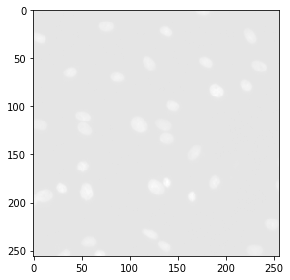

In [24]:
crop_mask = ip.predict(tm, stride=16)
imshow(crop_mask[0])

Getting predictions for resized input ...
Time Usage: 0.132429122925 sec


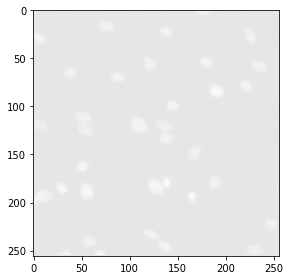

In [25]:
resize_mask = ip.predict_resized(tm)
imshow(resize_mask[0])

##### Testing Io

In [26]:
from skimage import io, exposure, img_as_uint, img_as_float
path = 'data/test_prediction'
if not os.path.exists(path):
    os.makedirs(path)
for i, pred in enumerate(crop_mask):
    fname = "{PATH}/fig{ID}.png".format(PATH=path, ID=str(i))
    io.imsave(fname, pred)
    print pred.shape, pred.max(),pred.min()

/opt/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/opt/anaconda2/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: data/test_prediction/fig1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda2/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: data/test_prediction/fig2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


(256, 256) 1.0 0.893294
(256, 320) 1.0 0.951681
(256, 256) 1.0 0.930895
(256, 256) 1.0 0.908017
(360, 360) 1.0 0.9499


/opt/anaconda2/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: data/test_prediction/fig4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda2/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: data/test_prediction/fig5.png is a low contrast image
  warn('%s is a low contrast image' % fname)


(256, 320) 1.0 0.931693


In [27]:
check = []
for i in range(6):
    tmp_img = imread(path+'/fig'+str(i) + '.png')/65535.
    print tmp_img.shape, tmp_img.max(), tmp_img.min()
    check.append(tmp_img)

(256, 256) 1.0 0.893293659876
(256, 320) 1.0 0.951674677653
(256, 256) 1.0 0.93089188983
(256, 256) 1.0 0.908018616007
(360, 360) 1.0 0.949904631113
(256, 320) 1.0 0.931685358968


In [28]:
ip.save_predictions(path=path)

Saving predictions ...


/opt/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/opt/anaconda2/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: 718751b439c05bdd589f04fcef321a86be3ecb35292a435138e295e05eb2e771.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda2/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: edd36ed822e7ed760ff73e0524df22aa5bf5c565efcdc6c39603239c0896e7a8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda2/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: 670ebd9d674be236b9bf0b28650ad3f68e1891b06e16a9021fd069ca7ef32b78.png is a low contrast image
  warn('%s is a low contrast image' % fname)


#### `ip.encoding`: runlength encoding:
    
    - threshod: the threshold probability